## Plot results

The purpose of this notebook is to visualize models' performances singlehandedly and/or with respect to each other's. It expects the selected models to have already gone through training using the `run_exp_script.py` script.

In [99]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from models.double_branch import DoubleBranchCNN
from utils import plot_utils as plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train/Val Plot

In [104]:
RESULT_PATH = 'models/results/rn18_ms_e2e_l7_yeh.pkl'
# Load Results
with open(RESULT_PATH, 'rb') as f:
    results = pickle.load(f)

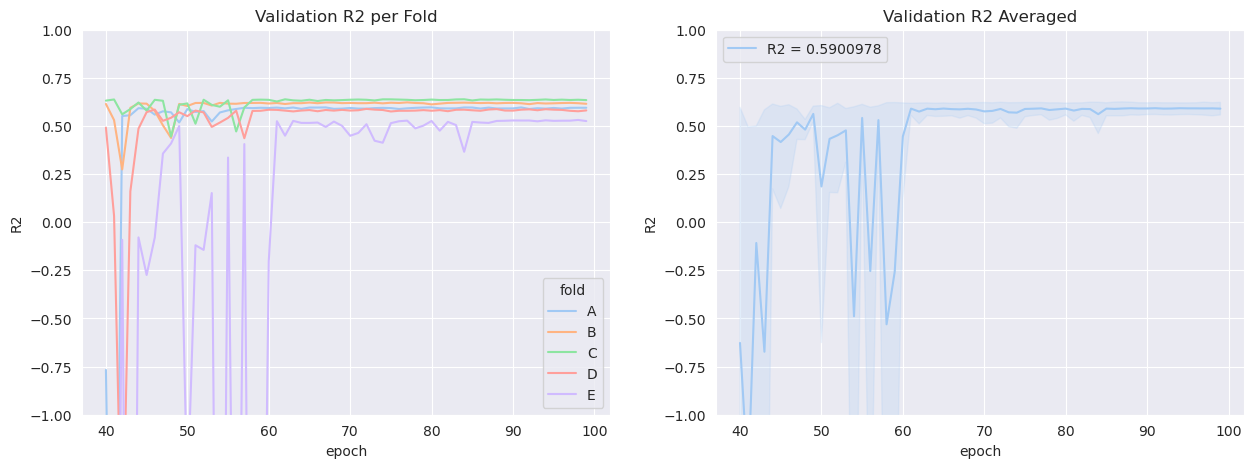

In [106]:
multi_val_dict = plot.extract_crossval_results(results=results, var='test_r2', new_var="R2")
df = pd.DataFrame.from_dict(multi_val_dict)
df=df[df.epoch >= 40] # skip unstable first epochs
# Figures
sns.set_palette('pastel')
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].set_title('Validation R2 per Fold')
ax[1].set_title('Validation R2 Averaged')
sns.lineplot(ax=ax[0], data=df, x="epoch", y="R2", hue="fold", palette="pastel").set(ylim=(-1, 1))
sns.lineplot(ax=ax[1], data=df, x="epoch", y="R2", legend=False).set(ylim=(-1,1.))

# Add R2 value
df2 = df[df['epoch']==df['epoch'].max()]
ax[1].legend(title='', loc='upper left', labels=['R2 = '+str(df2.R2.mean())])


### Test Plots

In [98]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from models.from_config import build_model
import test
network_config_filename='configs/resnet18_ms_e2e_l7_yeh.json'
data_config_filename='configs/default_config.pkl'
save_path='results/ms.pkl'

In [ ]:
df_test = test.main(
    write_path=save_path,
    data_config_filename=data_config_filename,
    network_config_filename=network_config_filename
)
df_test.head()

**Old vs. New**

In [110]:
africa = gpd.read_file('data/africa.json')
africa.columns

Index(['id', 'ADM0_CODE', 'ADM0_NAME', 'CONTINENT', 'ISO3', 'ISO2', 'UNI',
       'UNDP', 'FAOSTAT', 'GAUL', 'RIC_ISO3', 'REC_ISO3', 'AFR', 'CEMAC',
       'CILSS', 'CRA', 'ECOWAS', 'IGAD', 'IOC', 'SADC', 'CICOS', 'ICPAC',
       'BDMS', 'MOI', 'geometry'],
      dtype='object')

/home/matthieu/anaconda3/envs/mpa_env/lib/python3.10/site-packages/geopandas/plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<Axes: >

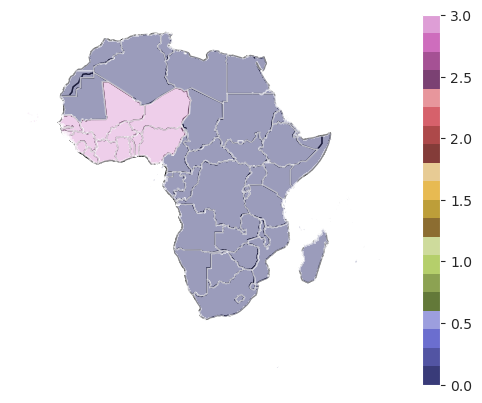

In [113]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world.continent == 'Africa'].plot(color='white', edgecolor='black')
base.set_axis_off()

africa.plot(
    column='ECOWAS', 
    markersize=6,
    alpha=0.5, 
    ax=base, 
    legend=True, 
    colormap='tab20b',
    figsize=(30,30)
    )

**Per Country**

### Multi Model Plot